In [9]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import *
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import BinaryClassificationEvaluator 
from pyspark import SparkContext
from pyspark.sql import SparkSession
import pickle

%matplotlib inline

# Train data

In [22]:
train_dir = './Dataset/train'
height = width = 48

train_list = []
train_files = os.listdir(train_dir)
for file in train_files:
    img = cv2.imread(os.path.join(train_dir,file))
    img = cv2.resize(img,(width,height))
    final_img = cv2.normalize(img,None,0,1,norm_type=cv2.NORM_MINMAX,dtype=cv2.CV_32F)
    final_img = final_img.flatten()
    if 'dog' in file: final_img = np.append(final_img,0)
    else: final_img = np.append(final_img,1)
    train_list.append(final_img)
    print(file)
    
train_list = np.asarray(train_list)

dog.11082.jpg
dog.2404.jpg
cat.6056.jpg
dog.6631.jpg
cat.10086.jpg
dog.8639.jpg
cat.2814.jpg
dog.12157.jpg
cat.4954.jpg
cat.1970.jpg
dog.8149.jpg
dog.8598.jpg
dog.1002.jpg
dog.1687.jpg
cat.6336.jpg
cat.5970.jpg
dog.7409.jpg
dog.725.jpg
cat.1429.jpg
cat.2591.jpg
dog.7675.jpg
cat.328.jpg
cat.9986.jpg
cat.10204.jpg
cat.11214.jpg
dog.7673.jpg
dog.6111.jpg
dog.7875.jpg
cat.7007.jpg
cat.3391.jpg
dog.10057.jpg
cat.11096.jpg
cat.7753.jpg
dog.8256.jpg
dog.12232.jpg
cat.3812.jpg
dog.3821.jpg
cat.9994.jpg
cat.7660.jpg
cat.7248.jpg
cat.6669.jpg
cat.326.jpg
dog.940.jpg
cat.6674.jpg
dog.4469.jpg
cat.512.jpg
dog.9845.jpg
cat.8709.jpg
cat.2771.jpg
cat.9425.jpg
cat.4851.jpg
dog.4280.jpg
cat.2261.jpg
cat.7303.jpg
cat.7198.jpg
cat.4464.jpg
cat.8189.jpg
cat.1686.jpg
dog.1288.jpg
dog.11190.jpg
dog.1683.jpg
dog.5438.jpg
cat.8765.jpg
cat.4940.jpg
dog.6320.jpg
cat.382.jpg
dog.11403.jpg
dog.11437.jpg
cat.2365.jpg
dog.12472.jpg
dog.2212.jpg
dog.408.jpg
dog.2961.jpg
dog.4075.jpg
dog.7853.jpg
cat.10325.jpg
cat.10

dog.1679.jpg
cat.2684.jpg
cat.5881.jpg
dog.7699.jpg
cat.9175.jpg
dog.8492.jpg
dog.3928.jpg
dog.3039.jpg
dog.10695.jpg
cat.7155.jpg
cat.7740.jpg
cat.10069.jpg
cat.4708.jpg
dog.2430.jpg
dog.9384.jpg
dog.5060.jpg
dog.8458.jpg
dog.6917.jpg
cat.9972.jpg
cat.8851.jpg
dog.10182.jpg
dog.7590.jpg
dog.10068.jpg
dog.2992.jpg
dog.8522.jpg
dog.10494.jpg
dog.1549.jpg
dog.2201.jpg
dog.92.jpg
dog.8616.jpg
cat.7790.jpg
dog.10125.jpg
dog.9169.jpg
cat.11947.jpg
dog.6378.jpg
cat.3826.jpg
cat.1376.jpg
cat.11634.jpg
dog.8833.jpg
cat.4344.jpg
dog.6370.jpg
cat.3992.jpg
dog.4659.jpg
dog.3233.jpg
dog.9204.jpg
dog.10523.jpg
dog.4247.jpg
cat.9237.jpg
cat.5502.jpg
cat.739.jpg
cat.3684.jpg
cat.755.jpg
cat.9594.jpg
cat.8562.jpg
cat.1495.jpg
dog.8098.jpg
cat.8134.jpg
dog.908.jpg
cat.9580.jpg
cat.783.jpg
dog.2627.jpg
dog.6607.jpg
dog.438.jpg
cat.8146.jpg
dog.1235.jpg
cat.12264.jpg
cat.8064.jpg
dog.2393.jpg
dog.6603.jpg
dog.2977.jpg
cat.11356.jpg
dog.8201.jpg
cat.8925.jpg
cat.3156.jpg
cat.10572.jpg
cat.4234.jpg
cat.773

dog.6700.jpg
dog.2880.jpg
cat.6495.jpg
dog.6975.jpg
cat.7527.jpg
dog.12363.jpg
cat.214.jpg
dog.2276.jpg
cat.5481.jpg
cat.9595.jpg
dog.3655.jpg
cat.9439.jpg
dog.5343.jpg
dog.8547.jpg
dog.3568.jpg
cat.4512.jpg
dog.3862.jpg
cat.5950.jpg
dog.3026.jpg
dog.4567.jpg
cat.4672.jpg
cat.8992.jpg
dog.266.jpg
dog.6180.jpg
cat.10590.jpg
cat.10950.jpg
cat.5082.jpg
cat.4985.jpg
cat.2940.jpg
cat.6075.jpg
cat.6397.jpg
dog.2678.jpg
cat.10863.jpg
cat.6925.jpg
cat.5168.jpg
cat.17.jpg
dog.260.jpg
dog.1054.jpg
dog.1546.jpg
dog.4369.jpg
dog.2870.jpg
cat.9528.jpg
dog.7068.jpg
cat.488.jpg
cat.8090.jpg
dog.1216.jpg
dog.3681.jpg
dog.115.jpg
cat.554.jpg
cat.8681.jpg
dog.10019.jpg
cat.906.jpg
cat.3821.jpg
dog.3805.jpg
dog.1649.jpg
cat.6766.jpg
dog.495.jpg
cat.11140.jpg
dog.7680.jpg
dog.994.jpg
cat.2876.jpg
cat.9371.jpg
cat.1720.jpg
dog.995.jpg
cat.812.jpg
cat.7333.jpg
dog.2616.jpg
dog.4250.jpg
cat.9440.jpg
dog.7163.jpg
cat.6255.jpg
dog.1720.jpg
cat.8381.jpg
dog.89.jpg
cat.7059.jpg
dog.9176.jpg
dog.2900.jpg
dog.79.j

cat.4810.jpg
dog.9273.jpg
cat.1607.jpg
cat.4333.jpg
cat.9382.jpg
cat.12465.jpg
cat.12097.jpg
dog.6041.jpg
cat.11150.jpg
dog.4650.jpg
cat.2784.jpg
cat.2044.jpg
dog.3731.jpg
dog.1163.jpg
dog.10928.jpg
cat.9830.jpg
cat.2865.jpg
cat.5978.jpg
dog.1807.jpg
dog.3209.jpg
cat.9038.jpg
cat.10600.jpg
cat.2988.jpg
cat.8280.jpg
dog.8188.jpg
dog.3968.jpg
dog.6435.jpg
dog.2289.jpg
cat.1665.jpg
cat.1084.jpg
cat.7099.jpg
dog.686.jpg
dog.3210.jpg
cat.9013.jpg
dog.4666.jpg
dog.5161.jpg
cat.11490.jpg
cat.4143.jpg
cat.1982.jpg
cat.2590.jpg
dog.2521.jpg
dog.4931.jpg
cat.1411.jpg
dog.11435.jpg
dog.1114.jpg
cat.7668.jpg
dog.1751.jpg
dog.7532.jpg
cat.4693.jpg
cat.9356.jpg
dog.936.jpg
cat.8810.jpg
cat.2369.jpg
cat.12085.jpg
dog.4221.jpg
cat.1177.jpg
cat.6991.jpg
dog.11031.jpg
dog.11510.jpg
dog.4919.jpg
cat.7060.jpg
cat.8400.jpg
dog.4577.jpg
cat.4961.jpg
dog.11825.jpg
dog.9323.jpg
cat.8285.jpg
dog.4879.jpg
dog.9437.jpg
dog.11708.jpg
cat.6921.jpg
cat.7533.jpg
cat.5044.jpg
dog.5145.jpg
dog.9050.jpg
dog.8752.jpg
ca

dog.9660.jpg
dog.2736.jpg
cat.10027.jpg
dog.8797.jpg
dog.9877.jpg
dog.11977.jpg
cat.10295.jpg
cat.9214.jpg
cat.3672.jpg
cat.768.jpg
dog.3304.jpg
cat.3532.jpg
dog.713.jpg
cat.9516.jpg
cat.1948.jpg
dog.297.jpg
cat.1351.jpg
dog.10397.jpg
dog.9895.jpg
dog.9032.jpg
cat.11258.jpg
cat.5133.jpg
cat.10359.jpg
cat.5137.jpg
cat.2874.jpg
cat.158.jpg
dog.8052.jpg
dog.1568.jpg
cat.8247.jpg
cat.7926.jpg
dog.1340.jpg
cat.6115.jpg
cat.11427.jpg
cat.11499.jpg
dog.11023.jpg
cat.11405.jpg
cat.536.jpg
cat.7712.jpg
dog.2268.jpg
cat.8936.jpg
dog.2316.jpg
dog.3047.jpg
dog.10645.jpg
cat.4248.jpg
dog.10242.jpg
cat.9134.jpg
dog.6432.jpg
cat.9182.jpg
cat.4782.jpg
cat.6053.jpg
cat.5025.jpg
dog.3652.jpg
cat.603.jpg
dog.8009.jpg
cat.7242.jpg
cat.2139.jpg
cat.1740.jpg
cat.9960.jpg
cat.1338.jpg
dog.9213.jpg
dog.10428.jpg
dog.4188.jpg
dog.7206.jpg
dog.11290.jpg
cat.10489.jpg
dog.7252.jpg
dog.462.jpg
cat.4382.jpg
cat.5200.jpg
cat.487.jpg
dog.887.jpg
cat.3009.jpg
cat.5920.jpg
cat.4043.jpg
dog.826.jpg
dog.1664.jpg
dog.147

dog.2209.jpg
cat.12315.jpg
cat.10132.jpg
cat.3629.jpg
dog.3823.jpg
dog.10804.jpg
cat.9610.jpg
dog.10226.jpg
dog.11274.jpg
cat.11163.jpg
dog.6043.jpg
dog.7266.jpg
dog.7648.jpg
cat.10322.jpg
cat.8826.jpg
cat.12118.jpg
dog.2608.jpg
cat.3745.jpg
cat.2353.jpg
dog.3842.jpg
cat.10225.jpg
dog.2819.jpg
dog.1436.jpg
cat.4422.jpg
cat.9139.jpg
dog.8939.jpg
dog.10794.jpg
dog.8111.jpg
cat.9576.jpg
dog.899.jpg
cat.11691.jpg
dog.2875.jpg
cat.4947.jpg
dog.12037.jpg
cat.4674.jpg
cat.1882.jpg
dog.9001.jpg
dog.2742.jpg
cat.2597.jpg
cat.2644.jpg
dog.3051.jpg
cat.8557.jpg
dog.2644.jpg
dog.10260.jpg
cat.2626.jpg
dog.8674.jpg
cat.4117.jpg
dog.7159.jpg
dog.1920.jpg
dog.4915.jpg
dog.1194.jpg
dog.9601.jpg
cat.9021.jpg
dog.309.jpg
cat.4702.jpg
cat.82.jpg
cat.160.jpg
dog.351.jpg
cat.7736.jpg
cat.5507.jpg
dog.6951.jpg
dog.12221.jpg
cat.4185.jpg
cat.11271.jpg
dog.4826.jpg
cat.543.jpg
dog.10122.jpg
cat.11977.jpg
dog.5883.jpg
cat.5738.jpg
dog.7736.jpg
dog.8728.jpg
cat.7290.jpg
dog.10073.jpg
cat.2774.jpg
cat.569.jpg
do

cat.4587.jpg
dog.9445.jpg
cat.3158.jpg
cat.5419.jpg
dog.4563.jpg
dog.3508.jpg
cat.3233.jpg
cat.3167.jpg
cat.10851.jpg
cat.8583.jpg
dog.3070.jpg
dog.10762.jpg
dog.9406.jpg
dog.7770.jpg
cat.8774.jpg
dog.2971.jpg
cat.5163.jpg
cat.10507.jpg
cat.5438.jpg
dog.702.jpg
dog.1298.jpg
cat.9543.jpg
dog.855.jpg
cat.9951.jpg
cat.10316.jpg
dog.11752.jpg
cat.3727.jpg
dog.6689.jpg
cat.722.jpg
cat.8135.jpg
dog.806.jpg
cat.5153.jpg
cat.2508.jpg
dog.5847.jpg
dog.8834.jpg
dog.8311.jpg
dog.5555.jpg
dog.3190.jpg
dog.2655.jpg
dog.5872.jpg
dog.8540.jpg
dog.4261.jpg
dog.8056.jpg
cat.1298.jpg
dog.3159.jpg
dog.6526.jpg
cat.1154.jpg
cat.7268.jpg
cat.5490.jpg
dog.5861.jpg
cat.10248.jpg
cat.6070.jpg
cat.6117.jpg
cat.2070.jpg
dog.5628.jpg
dog.7271.jpg
dog.3308.jpg
cat.9767.jpg
dog.4504.jpg
dog.7458.jpg
dog.6232.jpg
dog.9201.jpg
cat.6380.jpg
cat.5713.jpg
dog.10139.jpg
cat.12458.jpg
cat.3839.jpg
cat.10134.jpg
cat.2468.jpg
dog.10412.jpg
cat.11957.jpg
cat.6261.jpg
cat.7073.jpg
dog.9610.jpg
cat.11418.jpg
cat.1731.jpg
cat.

cat.11616.jpg
dog.3557.jpg
cat.2513.jpg
cat.10755.jpg
dog.5493.jpg
cat.1435.jpg
dog.6348.jpg
cat.8358.jpg
cat.7216.jpg
cat.4917.jpg
dog.10254.jpg
cat.7933.jpg
cat.10141.jpg
dog.5981.jpg
cat.8694.jpg
cat.11130.jpg
dog.4537.jpg
cat.842.jpg
cat.6283.jpg
dog.6892.jpg
dog.2568.jpg
dog.626.jpg
cat.8188.jpg
dog.996.jpg
cat.2971.jpg
dog.7248.jpg
dog.240.jpg
dog.9771.jpg
dog.2927.jpg
dog.9886.jpg
cat.10933.jpg
dog.949.jpg
dog.547.jpg
dog.12032.jpg
cat.12236.jpg
cat.5554.jpg
cat.1062.jpg
dog.7283.jpg
dog.10230.jpg
dog.11766.jpg
cat.7302.jpg
cat.12116.jpg
cat.4878.jpg
cat.8986.jpg
cat.3687.jpg
cat.12094.jpg
cat.4714.jpg
cat.4749.jpg
cat.10205.jpg
dog.1986.jpg
dog.589.jpg
dog.7822.jpg
cat.8604.jpg
dog.1518.jpg
cat.6288.jpg
dog.3341.jpg
cat.5627.jpg
dog.11703.jpg
dog.4492.jpg
dog.3117.jpg
cat.555.jpg
cat.11745.jpg
dog.1945.jpg
cat.5569.jpg
cat.6051.jpg
dog.3534.jpg
cat.9803.jpg
dog.152.jpg
dog.9962.jpg
dog.2111.jpg
cat.4913.jpg
dog.9920.jpg
dog.4333.jpg
dog.9782.jpg
dog.1291.jpg
cat.3689.jpg
cat.12

dog.659.jpg
dog.10700.jpg
cat.6720.jpg
cat.3058.jpg
cat.3996.jpg
dog.3049.jpg
dog.12489.jpg
cat.1462.jpg
dog.4300.jpg
dog.3769.jpg
dog.5022.jpg
dog.4792.jpg
dog.4137.jpg
dog.4252.jpg
dog.11990.jpg
cat.8517.jpg
cat.4721.jpg
dog.1749.jpg
dog.9707.jpg
cat.3542.jpg
cat.1067.jpg
dog.5419.jpg
cat.12001.jpg
cat.2573.jpg
cat.3085.jpg
cat.12017.jpg
dog.6841.jpg
dog.5304.jpg
dog.6108.jpg
cat.8942.jpg
dog.11413.jpg
cat.1114.jpg
dog.8499.jpg
cat.9619.jpg
dog.7402.jpg
cat.7573.jpg
dog.2024.jpg
dog.12486.jpg
cat.2287.jpg
cat.8238.jpg
cat.11733.jpg
cat.4485.jpg
dog.2098.jpg
dog.12483.jpg
cat.5022.jpg
cat.10334.jpg
dog.7104.jpg
dog.9492.jpg
cat.11181.jpg
cat.4925.jpg
cat.5436.jpg
cat.7637.jpg
cat.11576.jpg
dog.446.jpg
dog.6694.jpg
cat.3811.jpg
cat.1718.jpg
dog.2281.jpg
dog.11926.jpg
dog.8520.jpg
cat.1634.jpg
dog.3193.jpg
cat.11980.jpg
dog.4543.jpg
cat.4243.jpg
cat.11593.jpg
cat.4963.jpg
dog.10902.jpg
dog.8121.jpg
cat.9705.jpg
cat.6408.jpg
cat.8629.jpg
dog.650.jpg
cat.3406.jpg
dog.7842.jpg
cat.4024.jpg

cat.11976.jpg
dog.529.jpg
dog.11608.jpg
cat.2176.jpg
dog.4928.jpg
dog.1618.jpg
dog.10466.jpg
cat.3216.jpg
dog.2164.jpg
dog.8051.jpg
cat.1759.jpg
cat.8718.jpg
dog.10153.jpg
dog.864.jpg
dog.3163.jpg
cat.8602.jpg
dog.6159.jpg
dog.12029.jpg
cat.6038.jpg
cat.11687.jpg
cat.2534.jpg
cat.7806.jpg
cat.3297.jpg
dog.12066.jpg
cat.1768.jpg
cat.8268.jpg
cat.7619.jpg
cat.5483.jpg
cat.10110.jpg
cat.12431.jpg
dog.4284.jpg
dog.5769.jpg
dog.2713.jpg
dog.8172.jpg
dog.4044.jpg
cat.9667.jpg
cat.12449.jpg
dog.2975.jpg
dog.516.jpg
cat.10363.jpg
dog.8601.jpg
cat.893.jpg
dog.4954.jpg
cat.4368.jpg
cat.11238.jpg
dog.10011.jpg
cat.11037.jpg
dog.10945.jpg
dog.3959.jpg
dog.5684.jpg
cat.2968.jpg
cat.8770.jpg
dog.1576.jpg
dog.9341.jpg
cat.10370.jpg
cat.3867.jpg
dog.1377.jpg
dog.3240.jpg
dog.8472.jpg
dog.6274.jpg
dog.6271.jpg
dog.2136.jpg
dog.8054.jpg
dog.933.jpg
cat.6999.jpg
dog.1775.jpg
cat.2978.jpg
cat.12411.jpg
dog.8592.jpg
cat.2441.jpg
dog.10406.jpg
cat.7253.jpg
dog.7242.jpg
cat.10749.jpg
cat.4568.jpg
dog.10484.j

cat.10778.jpg
cat.3023.jpg
dog.1442.jpg
cat.4566.jpg
dog.7936.jpg
dog.8955.jpg
dog.6357.jpg
dog.1124.jpg
cat.7932.jpg
cat.2011.jpg
dog.11506.jpg
cat.4633.jpg
cat.1041.jpg
dog.6800.jpg
dog.12402.jpg
dog.8698.jpg
cat.7313.jpg
cat.1336.jpg
dog.10454.jpg
cat.1015.jpg
cat.12219.jpg
dog.2262.jpg
cat.6546.jpg
cat.6846.jpg
dog.4527.jpg
dog.2016.jpg
cat.6927.jpg
cat.3753.jpg
cat.8570.jpg
cat.6688.jpg
dog.5162.jpg
dog.3896.jpg
dog.61.jpg
cat.11279.jpg
cat.4357.jpg
dog.6409.jpg
cat.10423.jpg
dog.9765.jpg
dog.1198.jpg
cat.180.jpg
dog.1098.jpg
cat.8084.jpg
cat.10789.jpg
dog.892.jpg
cat.5071.jpg
cat.9495.jpg
cat.8732.jpg
cat.9090.jpg
cat.10061.jpg
dog.5726.jpg
dog.6598.jpg
dog.9471.jpg
dog.7028.jpg
cat.7169.jpg
cat.4538.jpg
cat.1006.jpg
dog.2695.jpg
dog.5884.jpg
dog.10642.jpg
cat.4677.jpg
cat.8691.jpg
cat.9991.jpg
dog.11358.jpg
dog.12297.jpg
dog.10793.jpg
cat.10466.jpg
cat.11885.jpg
cat.8545.jpg
cat.7872.jpg
cat.9550.jpg
dog.743.jpg
cat.2406.jpg
dog.2119.jpg
dog.12122.jpg
cat.8864.jpg
cat.10129.jpg


cat.10314.jpg
dog.1930.jpg
dog.1748.jpg
dog.4204.jpg
cat.10809.jpg
cat.8378.jpg
cat.39.jpg
dog.12095.jpg
dog.9247.jpg
dog.9456.jpg
dog.9994.jpg
dog.1016.jpg
dog.7404.jpg
dog.11748.jpg
dog.1334.jpg
dog.3033.jpg
dog.11008.jpg
cat.7415.jpg
cat.12012.jpg
cat.4830.jpg
dog.9161.jpg
dog.5156.jpg
cat.3315.jpg
dog.10024.jpg
cat.10684.jpg
dog.6715.jpg
cat.7525.jpg
cat.413.jpg
dog.7499.jpg
cat.700.jpg
dog.8513.jpg
dog.9757.jpg
dog.3154.jpg
dog.8251.jpg
dog.7724.jpg
dog.11670.jpg
dog.12062.jpg
dog.10170.jpg
dog.2929.jpg
dog.12053.jpg
dog.2138.jpg
dog.4660.jpg
dog.9302.jpg
dog.5048.jpg
dog.2437.jpg
dog.8577.jpg
dog.9912.jpg
cat.10235.jpg
cat.10445.jpg
cat.5262.jpg
dog.12190.jpg
dog.7355.jpg
dog.355.jpg
dog.9134.jpg
cat.472.jpg
cat.3422.jpg
dog.1287.jpg
dog.1524.jpg
dog.5490.jpg
cat.8414.jpg
dog.6483.jpg
dog.4909.jpg
dog.3501.jpg
cat.9393.jpg
dog.11874.jpg
cat.4112.jpg
cat.4643.jpg
dog.116.jpg
cat.3534.jpg
dog.9809.jpg
dog.9444.jpg
cat.10817.jpg
dog.7577.jpg
dog.11438.jpg
cat.5188.jpg
dog.11004.jpg


cat.12331.jpg
cat.1755.jpg
cat.9398.jpg
dog.8798.jpg
dog.9097.jpg
dog.8464.jpg
dog.8308.jpg
cat.5427.jpg
cat.11311.jpg
dog.12027.jpg
cat.12041.jpg
cat.6188.jpg
cat.7322.jpg
cat.12489.jpg
cat.8785.jpg
cat.1640.jpg
cat.12312.jpg
cat.3757.jpg
dog.3191.jpg
dog.5702.jpg
cat.2058.jpg
dog.11247.jpg
dog.11060.jpg
dog.2854.jpg
cat.8547.jpg
cat.336.jpg
dog.97.jpg
cat.7480.jpg
dog.411.jpg
cat.10614.jpg
dog.5504.jpg
dog.8536.jpg
cat.5275.jpg
dog.6257.jpg
dog.7644.jpg
dog.1769.jpg
dog.3743.jpg
dog.4458.jpg
dog.6315.jpg
dog.503.jpg
cat.6464.jpg
cat.4521.jpg
dog.7688.jpg
dog.9151.jpg
cat.4295.jpg
cat.11840.jpg
dog.4544.jpg
dog.7511.jpg
cat.6725.jpg
dog.9948.jpg
cat.9874.jpg
cat.10846.jpg
cat.1525.jpg
cat.9772.jpg
dog.7800.jpg
cat.4573.jpg
dog.6999.jpg
dog.6032.jpg
dog.3275.jpg
dog.11345.jpg
dog.4664.jpg
dog.7035.jpg
dog.8026.jpg
dog.5509.jpg
dog.4575.jpg
cat.7394.jpg
cat.5632.jpg
dog.2168.jpg
cat.3431.jpg
cat.3345.jpg
dog.3937.jpg
cat.12213.jpg
cat.5624.jpg
dog.7484.jpg
dog.1632.jpg
cat.939.jpg
dog.9

cat.9251.jpg
cat.4010.jpg
dog.4010.jpg
cat.1432.jpg
cat.1578.jpg
cat.449.jpg
cat.14.jpg
cat.9987.jpg
dog.8736.jpg
cat.5311.jpg
cat.208.jpg
dog.6714.jpg
dog.1037.jpg
cat.9391.jpg
dog.456.jpg
dog.7350.jpg
cat.9110.jpg
dog.9157.jpg
cat.7110.jpg
cat.11867.jpg
dog.12167.jpg
cat.2448.jpg
cat.10135.jpg
dog.1630.jpg
dog.418.jpg
dog.715.jpg
cat.4593.jpg
cat.9774.jpg
cat.1487.jpg
dog.8014.jpg
dog.872.jpg
dog.3090.jpg
dog.8347.jpg
dog.8751.jpg
dog.328.jpg
cat.10741.jpg
dog.2959.jpg
cat.4450.jpg
cat.9172.jpg
dog.4946.jpg
dog.2986.jpg
dog.6411.jpg
cat.7230.jpg
dog.10732.jpg
dog.8255.jpg
cat.6759.jpg
cat.2618.jpg
dog.11696.jpg
dog.5828.jpg
dog.10894.jpg
cat.3459.jpg
dog.11431.jpg
dog.1678.jpg
dog.3682.jpg
dog.9117.jpg
dog.9314.jpg
dog.5668.jpg
cat.8528.jpg
cat.11085.jpg
dog.5873.jpg
dog.2681.jpg
cat.2113.jpg
cat.7678.jpg
cat.5343.jpg
dog.2081.jpg
cat.10991.jpg
cat.1122.jpg
dog.1681.jpg
dog.1384.jpg
dog.11319.jpg
cat.2741.jpg
cat.10400.jpg
cat.7784.jpg
cat.11866.jpg
cat.11857.jpg
cat.4001.jpg
dog.308

dog.8156.jpg
dog.2089.jpg
cat.7207.jpg
dog.4374.jpg
dog.6197.jpg
dog.986.jpg
cat.11136.jpg
cat.5675.jpg
cat.4711.jpg
dog.1244.jpg
dog.10219.jpg
cat.1583.jpg
cat.7368.jpg
dog.6887.jpg
dog.6835.jpg
dog.455.jpg
cat.8700.jpg
cat.187.jpg
cat.12186.jpg
cat.3828.jpg
dog.7195.jpg
dog.11925.jpg
cat.5821.jpg
cat.6473.jpg
dog.6363.jpg
cat.5173.jpg
cat.5194.jpg
cat.5810.jpg
cat.7907.jpg
dog.5969.jpg
dog.3185.jpg
cat.5596.jpg
dog.10211.jpg
dog.4656.jpg
dog.283.jpg
cat.2520.jpg
cat.233.jpg
dog.2270.jpg
dog.4926.jpg
dog.8169.jpg
cat.738.jpg
cat.4561.jpg
cat.10393.jpg
dog.1424.jpg
cat.4827.jpg
cat.5332.jpg
dog.957.jpg
cat.87.jpg
cat.7043.jpg
cat.374.jpg
cat.1458.jpg
cat.10039.jpg
cat.8495.jpg
cat.5723.jpg
dog.7732.jpg
cat.11015.jpg
dog.6134.jpg
cat.1225.jpg
cat.2430.jpg
cat.11767.jpg
cat.1971.jpg
dog.9255.jpg
dog.5638.jpg
dog.4422.jpg
cat.3401.jpg
dog.7351.jpg
cat.4818.jpg
cat.12123.jpg
cat.11196.jpg
dog.1846.jpg
dog.4746.jpg
dog.1242.jpg
cat.5158.jpg
dog.10830.jpg
cat.11222.jpg
cat.8768.jpg
cat.10117

cat.11943.jpg
dog.7385.jpg
dog.3511.jpg
cat.3446.jpg
dog.3069.jpg
dog.3357.jpg
cat.11586.jpg
cat.682.jpg
cat.3824.jpg
dog.11183.jpg
cat.2540.jpg
dog.4678.jpg
dog.6798.jpg
cat.3432.jpg
dog.324.jpg
dog.7081.jpg
dog.5347.jpg
cat.6394.jpg
cat.11201.jpg
dog.8467.jpg
dog.5443.jpg
cat.9787.jpg
cat.4173.jpg
dog.1024.jpg
dog.7500.jpg
dog.6065.jpg
cat.6411.jpg
cat.3081.jpg
cat.8494.jpg
dog.6596.jpg
cat.75.jpg
dog.10372.jpg
dog.7821.jpg
dog.4363.jpg
cat.10167.jpg
dog.1557.jpg
cat.1999.jpg
dog.1857.jpg
cat.11011.jpg
cat.9920.jpg
cat.11384.jpg
dog.3290.jpg
cat.6880.jpg
cat.6704.jpg
dog.10374.jpg
dog.10570.jpg
dog.10131.jpg
cat.6351.jpg
dog.3024.jpg
dog.10647.jpg
dog.5396.jpg
dog.1238.jpg
dog.6919.jpg
cat.5327.jpg
dog.6147.jpg
dog.8453.jpg
cat.11693.jpg
cat.4402.jpg
cat.1546.jpg
cat.5356.jpg
dog.12428.jpg
cat.331.jpg
dog.9810.jpg
dog.3999.jpg
cat.7460.jpg
dog.9545.jpg
cat.5261.jpg
dog.11496.jpg
dog.11.jpg
cat.1239.jpg
dog.2637.jpg
dog.10074.jpg
dog.8490.jpg
dog.3251.jpg
cat.6949.jpg
dog.3552.jpg
cat

dog.4979.jpg
dog.2436.jpg
dog.1402.jpg
dog.4799.jpg
cat.10673.jpg
dog.8019.jpg
cat.5756.jpg
dog.11982.jpg
cat.11864.jpg
dog.12429.jpg
cat.556.jpg
dog.1383.jpg
cat.7246.jpg
dog.3545.jpg
cat.2974.jpg
cat.7365.jpg
cat.7534.jpg
dog.3603.jpg
dog.8238.jpg
cat.4139.jpg
dog.3730.jpg
cat.9068.jpg
dog.110.jpg
cat.3979.jpg
dog.818.jpg
cat.6496.jpg
cat.10082.jpg
cat.10002.jpg
cat.11988.jpg
dog.1342.jpg
cat.6944.jpg
cat.1846.jpg
dog.8162.jpg
cat.2818.jpg
dog.5084.jpg
dog.4282.jpg
cat.1635.jpg
cat.6582.jpg
cat.4036.jpg
dog.6973.jpg
dog.11515.jpg
cat.4191.jpg
cat.5614.jpg
dog.6839.jpg
dog.1315.jpg
cat.2939.jpg
dog.3092.jpg
cat.628.jpg
dog.6915.jpg
cat.4192.jpg
dog.10001.jpg
cat.5014.jpg
cat.1675.jpg
cat.4613.jpg
cat.9125.jpg
cat.10681.jpg
dog.12418.jpg
cat.8879.jpg
cat.4840.jpg
cat.11194.jpg
cat.9260.jpg
dog.934.jpg
cat.709.jpg
cat.4502.jpg
cat.2251.jpg
dog.1887.jpg
dog.7452.jpg
dog.9.jpg
dog.2737.jpg
dog.9478.jpg
dog.3264.jpg
cat.10653.jpg
dog.5429.jpg
cat.2005.jpg
dog.8783.jpg
cat.524.jpg
cat.1182.

dog.3081.jpg
dog.2351.jpg
cat.11731.jpg
cat.2172.jpg
cat.11138.jpg
dog.4264.jpg
cat.8184.jpg
dog.10887.jpg
dog.9837.jpg
cat.9253.jpg
cat.4719.jpg
dog.11558.jpg
dog.10405.jpg
dog.9184.jpg
dog.2043.jpg
cat.9313.jpg
cat.8907.jpg
dog.10785.jpg
dog.9479.jpg
cat.3635.jpg
dog.1404.jpg
cat.6321.jpg
cat.1681.jpg
cat.978.jpg
cat.8916.jpg
dog.584.jpg
dog.6561.jpg
dog.9670.jpg
dog.1025.jpg
cat.4383.jpg
cat.378.jpg
cat.9745.jpg
cat.2395.jpg
cat.394.jpg
cat.4911.jpg
dog.12237.jpg
cat.2156.jpg
cat.347.jpg
dog.8738.jpg
dog.3333.jpg
cat.310.jpg
cat.2144.jpg
dog.6156.jpg
cat.4585.jpg
dog.4661.jpg
dog.9529.jpg
dog.2360.jpg
dog.8882.jpg
dog.2256.jpg
cat.11467.jpg
cat.6030.jpg
dog.12005.jpg
cat.7346.jpg
cat.8505.jpg
dog.2335.jpg
dog.11053.jpg
dog.6270.jpg
cat.4528.jpg
dog.6421.jpg
dog.9281.jpg
dog.2769.jpg
cat.6027.jpg
dog.12209.jpg
dog.7245.jpg
dog.8438.jpg
dog.5678.jpg
dog.5465.jpg
cat.4595.jpg
dog.2839.jpg
dog.4713.jpg
cat.6630.jpg
cat.6778.jpg
dog.439.jpg
dog.6581.jpg
dog.12086.jpg
cat.10712.jpg
dog.12

cat.12175.jpg
cat.11951.jpg
dog.4895.jpg
cat.6266.jpg
cat.3723.jpg
dog.9619.jpg
dog.10858.jpg
dog.10613.jpg
cat.10709.jpg
dog.7570.jpg
cat.7104.jpg
dog.7184.jpg
dog.6636.jpg
cat.9792.jpg
cat.363.jpg
dog.3058.jpg
cat.6591.jpg
cat.11358.jpg
cat.2587.jpg
cat.10743.jpg
dog.3454.jpg
dog.11652.jpg
cat.10468.jpg
cat.7137.jpg
dog.7565.jpg
dog.3555.jpg
dog.8046.jpg
cat.3049.jpg
cat.7748.jpg
cat.4475.jpg
dog.11915.jpg
cat.853.jpg
cat.9577.jpg
cat.2536.jpg
cat.4016.jpg
cat.1059.jpg
cat.4385.jpg
dog.12313.jpg
cat.2645.jpg
dog.10729.jpg
dog.9256.jpg
cat.137.jpg
cat.9616.jpg
cat.7901.jpg
cat.9460.jpg
cat.11225.jpg
dog.1994.jpg
cat.6717.jpg
cat.6680.jpg
cat.4887.jpg
dog.504.jpg
dog.2293.jpg
cat.1500.jpg
dog.4106.jpg
dog.1626.jpg
dog.8810.jpg
dog.10032.jpg
cat.1623.jpg
cat.12042.jpg
cat.11232.jpg
cat.3512.jpg
cat.884.jpg
dog.12465.jpg
dog.3660.jpg
cat.8007.jpg
dog.11554.jpg
cat.5784.jpg
cat.11404.jpg
dog.1236.jpg
cat.8277.jpg
cat.9630.jpg
cat.4906.jpg
cat.4134.jpg
dog.3855.jpg
cat.9458.jpg
dog.7481.jp

dog.5696.jpg
dog.11179.jpg
dog.6660.jpg
cat.10128.jpg
cat.4889.jpg
dog.1152.jpg
cat.7592.jpg
dog.11534.jpg
cat.8369.jpg
cat.3974.jpg
cat.1034.jpg
cat.7422.jpg
dog.9631.jpg
cat.872.jpg
dog.352.jpg
dog.9613.jpg
cat.4949.jpg
dog.6254.jpg
dog.5114.jpg
cat.5148.jpg
cat.2927.jpg
dog.7514.jpg
dog.9261.jpg
dog.4134.jpg
cat.5315.jpg
dog.5406.jpg
dog.11218.jpg
cat.7688.jpg
cat.9995.jpg
cat.5157.jpg
cat.4860.jpg
dog.7507.jpg
cat.1100.jpg
dog.6954.jpg
cat.10371.jpg
dog.1252.jpg
cat.8417.jpg
dog.1596.jpg
cat.583.jpg
cat.3673.jpg
cat.12162.jpg
dog.10355.jpg
dog.6878.jpg
cat.3884.jpg
dog.3915.jpg
dog.9839.jpg
dog.11794.jpg
cat.5475.jpg
cat.2129.jpg
cat.10308.jpg
dog.11508.jpg
dog.1158.jpg
cat.1561.jpg
dog.9087.jpg
dog.7982.jpg
dog.8940.jpg
cat.9016.jpg
dog.9833.jpg
cat.2465.jpg
dog.9454.jpg
cat.3295.jpg
dog.3984.jpg
cat.1523.jpg
cat.6507.jpg
dog.8324.jpg
dog.5317.jpg
dog.3126.jpg
cat.7930.jpg
dog.3077.jpg
cat.2910.jpg
cat.11106.jpg
cat.7039.jpg
cat.4629.jpg
dog.467.jpg
dog.5511.jpg
dog.10881.jpg
cat.

dog.10836.jpg
dog.7486.jpg
dog.7194.jpg
dog.8661.jpg
dog.5155.jpg
cat.11336.jpg
dog.745.jpg
dog.4476.jpg
cat.4205.jpg
cat.886.jpg
dog.5814.jpg
cat.2832.jpg
dog.9973.jpg
cat.10234.jpg
cat.9136.jpg
dog.11276.jpg
cat.12445.jpg
dog.9326.jpg
cat.5648.jpg
dog.4802.jpg
dog.5510.jpg
cat.10648.jpg
dog.11739.jpg
dog.7751.jpg
dog.3318.jpg
dog.8115.jpg
dog.1781.jpg
cat.4536.jpg
dog.10275.jpg
dog.5111.jpg
cat.5134.jpg
cat.11173.jpg
dog.1919.jpg
dog.3243.jpg
cat.889.jpg
cat.8524.jpg
dog.11491.jpg
dog.9009.jpg
cat.289.jpg
cat.613.jpg
cat.559.jpg
dog.12090.jpg
dog.5979.jpg
cat.7669.jpg
cat.6243.jpg
dog.3776.jpg
dog.8304.jpg
cat.6328.jpg
dog.6741.jpg
dog.3182.jpg
cat.4090.jpg
cat.8827.jpg
dog.5533.jpg
dog.1972.jpg
cat.11014.jpg
cat.4498.jpg
cat.4020.jpg
cat.1622.jpg
cat.2321.jpg
cat.1956.jpg
dog.7359.jpg
cat.4551.jpg
dog.9812.jpg
cat.5002.jpg
cat.11393.jpg
cat.4816.jpg
dog.5740.jpg
dog.6094.jpg
dog.4822.jpg
cat.2785.jpg
dog.11497.jpg
dog.3420.jpg
dog.4671.jpg
cat.8229.jpg
dog.3349.jpg
cat.7309.jpg
cat.

dog.12406.jpg
dog.7696.jpg
cat.12173.jpg
dog.6832.jpg
dog.3447.jpg
cat.5733.jpg
dog.11237.jpg
cat.10629.jpg
cat.11949.jpg
cat.918.jpg
dog.9756.jpg
cat.2215.jpg
dog.2581.jpg
cat.4209.jpg
dog.9560.jpg
cat.5522.jpg
cat.7535.jpg
cat.4557.jpg
dog.8707.jpg
cat.7952.jpg
dog.2304.jpg
cat.1441.jpg
dog.1530.jpg
cat.5373.jpg
dog.1245.jpg
dog.9372.jpg
dog.4827.jpg
dog.12495.jpg
cat.8097.jpg
cat.6808.jpg
cat.6532.jpg
cat.869.jpg
dog.10860.jpg
dog.6655.jpg
cat.425.jpg
dog.2101.jpg
dog.12013.jpg
dog.7619.jpg
cat.4462.jpg
dog.9739.jpg
cat.9276.jpg
cat.9383.jpg
dog.2318.jpg
cat.4318.jpg
dog.4191.jpg
dog.8871.jpg
dog.8396.jpg
dog.3255.jpg
cat.2022.jpg
cat.3113.jpg
cat.2734.jpg
cat.12316.jpg
dog.2444.jpg
cat.8406.jpg
dog.9764.jpg
cat.4967.jpg
dog.7446.jpg
dog.5401.jpg
dog.9686.jpg
cat.2914.jpg
cat.1248.jpg
dog.1598.jpg
cat.10046.jpg
cat.8460.jpg
cat.9035.jpg
cat.819.jpg
dog.2158.jpg
cat.8142.jpg
dog.10787.jpg
cat.7565.jpg
cat.6185.jpg
cat.1031.jpg
cat.10978.jpg
dog.1414.jpg
cat.7584.jpg
cat.5782.jpg
cat.

dog.8782.jpg
dog.6562.jpg
dog.10232.jpg
cat.4927.jpg
cat.6201.jpg
dog.4401.jpg
cat.1200.jpg
dog.12386.jpg
cat.2566.jpg
cat.4292.jpg
cat.10540.jpg
cat.8586.jpg
dog.1858.jpg
cat.4152.jpg
dog.5854.jpg
dog.3716.jpg
cat.12135.jpg
dog.1848.jpg
cat.4637.jpg
cat.8112.jpg
dog.8258.jpg
cat.7466.jpg
cat.3920.jpg
cat.506.jpg
cat.9103.jpg
cat.10157.jpg
dog.12359.jpg
dog.1647.jpg
dog.1594.jpg
cat.5123.jpg
cat.1439.jpg
cat.1021.jpg
dog.6289.jpg
dog.2931.jpg
cat.7030.jpg
cat.335.jpg
dog.3219.jpg
dog.10752.jpg
cat.11994.jpg
cat.9914.jpg
dog.3867.jpg
cat.4965.jpg
dog.9690.jpg
dog.6760.jpg
dog.3034.jpg
cat.2707.jpg
cat.5460.jpg
dog.4627.jpg
dog.4551.jpg
dog.9987.jpg
dog.9160.jpg
dog.4343.jpg
cat.367.jpg
dog.10556.jpg
cat.3126.jpg
cat.10508.jpg
cat.7019.jpg
cat.9612.jpg
dog.2547.jpg
cat.11244.jpg
cat.8649.jpg
dog.2449.jpg
dog.12129.jpg
cat.9406.jpg
dog.7503.jpg
cat.10241.jpg
dog.10351.jpg
dog.4548.jpg
cat.756.jpg
cat.9404.jpg
cat.8742.jpg
cat.12216.jpg
dog.5325.jpg
dog.5322.jpg
cat.12148.jpg
dog.8027.jpg


dog.11122.jpg
dog.2278.jpg
cat.11455.jpg
dog.7943.jpg
cat.10838.jpg
dog.6854.jpg
dog.5201.jpg
dog.8276.jpg
cat.8162.jpg
cat.5277.jpg
cat.9765.jpg
dog.10220.jpg
dog.11146.jpg
dog.5986.jpg
cat.10992.jpg
dog.10155.jpg
dog.8688.jpg
dog.4673.jpg
cat.24.jpg
dog.8635.jpg
dog.12371.jpg
dog.9645.jpg
cat.7215.jpg
cat.5299.jpg
dog.6261.jpg
dog.10140.jpg
cat.4239.jpg
cat.10925.jpg
dog.8206.jpg
cat.9754.jpg
dog.7984.jpg
dog.6286.jpg
dog.1220.jpg
cat.598.jpg
cat.8387.jpg
dog.7988.jpg
cat.6885.jpg
cat.11149.jpg
dog.9162.jpg
cat.2798.jpg
dog.2824.jpg
cat.19.jpg
cat.11257.jpg
cat.7319.jpg
cat.3011.jpg
dog.8741.jpg
cat.3591.jpg
dog.1840.jpg
cat.8824.jpg
cat.6066.jpg
cat.10022.jpg
dog.9488.jpg
dog.2984.jpg
cat.4299.jpg
cat.2076.jpg
cat.5485.jpg
dog.9616.jpg
dog.8905.jpg
cat.1275.jpg
cat.8210.jpg
dog.1906.jpg
dog.7515.jpg
dog.239.jpg
dog.6613.jpg
cat.11160.jpg
dog.3795.jpg
cat.2415.jpg
dog.10998.jpg
dog.12061.jpg
cat.6016.jpg
cat.964.jpg
cat.9811.jpg
dog.7881.jpg
dog.7601.jpg
cat.4684.jpg
cat.7910.jpg
dog

dog.5244.jpg
dog.3409.jpg
cat.6939.jpg
dog.5185.jpg
dog.2990.jpg
cat.6696.jpg
cat.4399.jpg
cat.388.jpg
cat.4196.jpg
cat.7964.jpg
dog.190.jpg
cat.4876.jpg
dog.278.jpg
dog.9543.jpg
cat.7091.jpg
dog.10563.jpg
cat.11151.jpg
dog.8423.jpg
cat.3205.jpg
dog.6346.jpg
cat.6235.jpg
cat.6269.jpg
dog.3995.jpg
dog.3689.jpg
dog.9110.jpg
cat.6783.jpg
cat.11426.jpg
cat.1423.jpg
dog.9549.jpg
dog.10987.jpg
dog.7324.jpg
cat.6329.jpg
cat.11158.jpg
dog.6092.jpg
dog.7987.jpg
dog.9274.jpg
cat.3865.jpg
dog.2873.jpg
cat.4315.jpg
cat.4460.jpg
cat.12461.jpg
dog.11772.jpg
dog.7617.jpg
dog.9854.jpg
cat.6781.jpg
dog.1550.jpg
cat.519.jpg
cat.5862.jpg
cat.4021.jpg
dog.6938.jpg
cat.4434.jpg
cat.5470.jpg
cat.1604.jpg
cat.5956.jpg
cat.2714.jpg
cat.8854.jpg
cat.3439.jpg
dog.8594.jpg
dog.2309.jpg
cat.10754.jpg
dog.7914.jpg
dog.9823.jpg
cat.572.jpg
dog.4386.jpg
cat.3841.jpg
dog.3845.jpg
dog.2057.jpg
dog.8444.jpg
cat.12345.jpg
cat.2606.jpg
dog.6939.jpg
dog.3911.jpg
dog.4161.jpg
cat.10957.jpg
dog.3612.jpg
dog.6960.jpg
cat.740

cat.5593.jpg
cat.10546.jpg
dog.225.jpg
dog.6512.jpg
cat.8396.jpg
cat.9296.jpg
dog.6863.jpg
cat.11916.jpg
cat.2464.jpg
cat.4519.jpg
cat.11401.jpg
cat.3562.jpg
dog.10328.jpg
cat.9618.jpg
cat.9070.jpg
dog.8425.jpg
dog.1035.jpg
cat.2421.jpg
cat.6623.jpg
cat.10498.jpg
cat.10801.jpg
cat.8860.jpg
cat.4055.jpg
dog.6422.jpg
cat.923.jpg
cat.11569.jpg
cat.10968.jpg
dog.5033.jpg
dog.9798.jpg
cat.2096.jpg
cat.4754.jpg
dog.6726.jpg
dog.1898.jpg
cat.517.jpg
cat.637.jpg
cat.1601.jpg
cat.138.jpg
dog.1591.jpg
dog.1131.jpg
cat.6957.jpg
dog.10927.jpg
dog.2018.jpg
dog.7910.jpg
cat.2263.jpg
dog.7373.jpg
dog.8951.jpg
dog.12068.jpg
cat.6526.jpg
dog.8855.jpg
dog.1467.jpg
cat.4560.jpg
dog.10798.jpg
cat.1153.jpg
dog.9081.jpg
dog.12199.jpg
dog.5738.jpg
dog.10450.jpg
cat.956.jpg
dog.2972.jpg
dog.12253.jpg
dog.1157.jpg
dog.5784.jpg
dog.4049.jpg
dog.12383.jpg
cat.2191.jpg
cat.7095.jpg
dog.2511.jpg
cat.3038.jpg
dog.5764.jpg
dog.5326.jpg
dog.3852.jpg
cat.5855.jpg
cat.11484.jpg
dog.8485.jpg
cat.7075.jpg
dog.9227.jpg
ca

cat.4716.jpg
cat.1801.jpg
cat.785.jpg
dog.394.jpg
dog.8114.jpg
cat.7111.jpg
cat.10520.jpg
dog.4611.jpg
cat.10441.jpg
dog.9679.jpg
dog.10136.jpg
cat.8306.jpg
dog.4217.jpg
dog.5857.jpg
dog.10286.jpg
cat.5079.jpg
dog.3363.jpg
cat.2355.jpg
dog.12146.jpg
dog.5012.jpg
cat.1459.jpg
dog.1791.jpg
cat.8359.jpg
cat.1909.jpg
dog.7275.jpg
cat.9453.jpg
dog.2007.jpg
cat.4235.jpg
cat.4249.jpg
dog.2358.jpg
dog.6855.jpg
dog.1863.jpg
cat.11629.jpg
cat.8731.jpg
cat.5099.jpg
dog.5013.jpg
cat.4567.jpg
cat.9662.jpg
dog.3339.jpg
dog.6789.jpg
cat.2193.jpg
dog.4340.jpg
dog.9730.jpg
cat.10309.jpg
dog.9668.jpg
cat.4040.jpg
dog.6872.jpg
cat.11979.jpg
dog.5876.jpg
dog.8646.jpg
dog.10067.jpg
cat.4449.jpg
dog.9420.jpg
dog.2240.jpg
cat.10877.jpg
cat.8439.jpg
dog.9249.jpg
cat.6400.jpg
dog.8822.jpg
cat.2280.jpg
cat.1813.jpg
dog.12076.jpg
cat.5338.jpg
cat.6824.jpg
dog.1677.jpg
cat.8367.jpg
cat.11806.jpg
cat.1878.jpg
dog.4327.jpg
cat.4373.jpg
dog.5970.jpg
cat.2050.jpg
dog.10433.jpg
cat.11483.jpg
cat.1230.jpg
dog.2231.jpg


cat.1160.jpg
cat.710.jpg
cat.5410.jpg
dog.4614.jpg
cat.5736.jpg
cat.8910.jpg
cat.7613.jpg
cat.4454.jpg
dog.8382.jpg
cat.732.jpg
dog.2513.jpg
dog.8868.jpg
cat.12399.jpg
dog.9371.jpg
dog.1540.jpg
cat.2751.jpg
cat.9179.jpg
cat.6356.jpg
cat.6654.jpg
cat.6566.jpg
cat.8989.jpg
cat.9501.jpg
dog.2224.jpg
cat.9248.jpg
dog.11828.jpg
dog.289.jpg
cat.9143.jpg
dog.7920.jpg
cat.200.jpg
cat.9244.jpg
dog.867.jpg
dog.10715.jpg
cat.7601.jpg
dog.11993.jpg
cat.6125.jpg
dog.9324.jpg
dog.7181.jpg
dog.7155.jpg
dog.6133.jpg
dog.8449.jpg
cat.2729.jpg
dog.6090.jpg
cat.3413.jpg
cat.6379.jpg
dog.7543.jpg
dog.6244.jpg
cat.11641.jpg
cat.2178.jpg
cat.741.jpg
cat.9403.jpg
dog.2349.jpg
cat.4392.jpg
cat.787.jpg
cat.4398.jpg
dog.2883.jpg
cat.6870.jpg
dog.9300.jpg
dog.8831.jpg
dog.3359.jpg
cat.7727.jpg
cat.3358.jpg
cat.9437.jpg
cat.6312.jpg
cat.11816.jpg
dog.419.jpg
cat.926.jpg
cat.9006.jpg
cat.7182.jpg
cat.2949.jpg
cat.8260.jpg
dog.4912.jpg
dog.1910.jpg
cat.8833.jpg
dog.7792.jpg
dog.10134.jpg
dog.1197.jpg
dog.7979.jpg
d

dog.724.jpg
dog.6829.jpg
cat.1368.jpg
cat.2399.jpg
cat.8837.jpg
dog.7193.jpg
dog.10532.jpg
dog.6460.jpg
cat.5476.jpg
dog.4227.jpg
dog.7143.jpg
dog.8334.jpg
cat.10706.jpg
dog.5920.jpg
dog.11372.jpg
dog.3931.jpg
cat.2486.jpg
dog.2981.jpg
cat.10188.jpg
cat.5895.jpg
dog.5661.jpg
cat.2724.jpg
cat.7504.jpg
cat.7465.jpg
dog.1779.jpg
cat.8343.jpg
cat.6135.jpg
dog.5342.jpg
dog.7672.jpg
dog.227.jpg
dog.86.jpg
cat.12335.jpg
dog.10984.jpg
cat.9177.jpg
dog.4568.jpg
dog.946.jpg
cat.3671.jpg
dog.10926.jpg
dog.1950.jpg
dog.5786.jpg
cat.6399.jpg
dog.1258.jpg
cat.3583.jpg
dog.1587.jpg
cat.9556.jpg
cat.523.jpg
dog.6114.jpg
dog.5886.jpg
dog.5307.jpg
dog.8804.jpg
cat.10687.jpg
cat.4242.jpg
dog.807.jpg
dog.417.jpg
dog.10897.jpg
dog.7632.jpg
cat.4935.jpg
dog.5656.jpg
cat.564.jpg
cat.12262.jpg
dog.11619.jpg
dog.10085.jpg
dog.5020.jpg
dog.10682.jpg
cat.2091.jpg
cat.10270.jpg
dog.791.jpg
dog.10790.jpg
dog.10962.jpg
dog.11611.jpg
cat.7337.jpg
dog.7860.jpg
dog.3169.jpg
cat.4391.jpg
dog.5632.jpg
cat.1831.jpg
dog.9

dog.7362.jpg
dog.10867.jpg
dog.1084.jpg
dog.4054.jpg
cat.1673.jpg
dog.9207.jpg
dog.10015.jpg
dog.8199.jpg
cat.1161.jpg
dog.2715.jpg
dog.10868.jpg
dog.2591.jpg
cat.1167.jpg
dog.3811.jpg
cat.8753.jpg
dog.5615.jpg
dog.5451.jpg
cat.11794.jpg
cat.1426.jpg
cat.9835.jpg
cat.11437.jpg
dog.2216.jpg
cat.3693.jpg
dog.7063.jpg
dog.5525.jpg
cat.8113.jpg
cat.10172.jpg
dog.8937.jpg
cat.3180.jpg
cat.8521.jpg
dog.12078.jpg
cat.3724.jpg
dog.2478.jpg
dog.1979.jpg
dog.3838.jpg
cat.522.jpg
cat.9499.jpg
cat.4369.jpg
dog.2465.jpg
cat.3780.jpg
cat.3320.jpg
dog.2020.jpg
cat.5155.jpg
dog.8994.jpg
dog.2956.jpg
dog.4380.jpg
dog.9042.jpg
dog.6600.jpg
dog.679.jpg
cat.5853.jpg
dog.10853.jpg
cat.10104.jpg
cat.7685.jpg
cat.6524.jpg
cat.4384.jpg
dog.6275.jpg
dog.7479.jpg
cat.8258.jpg
dog.6801.jpg
cat.7129.jpg
dog.5669.jpg
cat.3116.jpg
dog.2685.jpg
cat.1704.jpg
cat.10332.jpg
dog.4083.jpg
cat.4760.jpg
cat.777.jpg
dog.5163.jpg
cat.6170.jpg
dog.2467.jpg
cat.8538.jpg
cat.5234.jpg
cat.372.jpg
dog.12141.jpg
dog.313.jpg
cat.85

dog.9592.jpg
cat.7090.jpg
dog.11865.jpg
cat.11169.jpg
cat.2559.jpg
dog.9181.jpg
dog.2122.jpg
dog.1862.jpg
dog.3207.jpg
cat.7829.jpg
cat.8316.jpg
cat.2958.jpg
cat.7715.jpg
dog.1045.jpg
cat.7902.jpg
dog.4194.jpg
cat.7011.jpg
cat.8230.jpg
cat.10449.jpg
dog.5562.jpg
dog.257.jpg
cat.11941.jpg
dog.12355.jpg
cat.4415.jpg
cat.11212.jpg
dog.4370.jpg
dog.42.jpg
dog.5513.jpg
dog.1283.jpg
dog.2439.jpg
dog.6448.jpg
dog.11481.jpg
dog.1716.jpg
cat.3462.jpg
cat.5461.jpg
cat.1888.jpg
dog.2868.jpg
dog.1266.jpg
cat.8207.jpg
dog.7707.jpg
dog.155.jpg
cat.5910.jpg
dog.5191.jpg
cat.2561.jpg
dog.680.jpg
cat.11744.jpg
cat.9241.jpg
dog.10716.jpg
cat.3144.jpg
cat.4929.jpg
cat.8790.jpg
dog.109.jpg
dog.9632.jpg
cat.11963.jpg
dog.8573.jpg
cat.5423.jpg
dog.3609.jpg
dog.9647.jpg
cat.1246.jpg
cat.10747.jpg
cat.3652.jpg
dog.6375.jpg
dog.9824.jpg
dog.3957.jpg
dog.5604.jpg
cat.6653.jpg
cat.9029.jpg
dog.193.jpg
dog.2942.jpg
cat.902.jpg
dog.332.jpg
dog.1200.jpg
dog.2495.jpg
dog.11718.jpg
cat.6899.jpg
dog.7172.jpg
dog.2153.

cat.6223.jpg
dog.177.jpg
cat.6116.jpg
dog.3293.jpg
cat.3249.jpg
cat.1960.jpg
cat.11023.jpg
cat.7605.jpg
dog.10464.jpg
cat.4101.jpg
dog.12325.jpg
cat.11781.jpg
cat.3447.jpg
dog.9918.jpg
cat.8646.jpg
dog.11054.jpg
dog.6051.jpg
dog.1567.jpg
cat.7621.jpg
dog.10072.jpg
dog.11449.jpg
cat.661.jpg
cat.12195.jpg
cat.10820.jpg
cat.10112.jpg
dog.1607.jpg
cat.10107.jpg
cat.3769.jpg
dog.3063.jpg
cat.5379.jpg
dog.4208.jpg
cat.6363.jpg
cat.808.jpg
cat.10688.jpg
dog.11931.jpg
cat.10951.jpg
cat.891.jpg
dog.10430.jpg
cat.11773.jpg
dog.8651.jpg
cat.10785.jpg
dog.1599.jpg
dog.4165.jpg
cat.4689.jpg
dog.8603.jpg
cat.493.jpg
cat.7728.jpg
dog.3544.jpg
dog.7657.jpg
dog.3700.jpg
cat.8196.jpg
dog.1125.jpg
dog.7841.jpg
cat.275.jpg
cat.10302.jpg
cat.10821.jpg
dog.1635.jpg
cat.2451.jpg
dog.9651.jpg
dog.7444.jpg
cat.4120.jpg
cat.4037.jpg
cat.7955.jpg
cat.10873.jpg
dog.10154.jpg
dog.11976.jpg
dog.5171.jpg
cat.1095.jpg
dog.2905.jpg
cat.9494.jpg
dog.3871.jpg
dog.1043.jpg
cat.7270.jpg
cat.6967.jpg
cat.9280.jpg
cat.4098.

dog.2863.jpg
dog.767.jpg
cat.3598.jpg
cat.1847.jpg
dog.1154.jpg
dog.1537.jpg
dog.2640.jpg
cat.4574.jpg
dog.9640.jpg
cat.8845.jpg
dog.11682.jpg
dog.5357.jpg
cat.6136.jpg
dog.1473.jpg
dog.10536.jpg
cat.7628.jpg
cat.8539.jpg
cat.5954.jpg
cat.2553.jpg
dog.176.jpg
dog.484.jpg
dog.6640.jpg
dog.10817.jpg
cat.7430.jpg
cat.6284.jpg
dog.9064.jpg
cat.7974.jpg
cat.3364.jpg
dog.494.jpg
dog.5082.jpg
cat.7755.jpg
dog.1882.jpg
dog.2019.jpg
cat.11929.jpg
cat.3451.jpg
dog.4484.jpg
cat.8503.jpg
dog.2594.jpg
cat.5323.jpg
cat.695.jpg
dog.7290.jpg
cat.5779.jpg
dog.9235.jpg
dog.6166.jpg
dog.4753.jpg
dog.3119.jpg
dog.1811.jpg
dog.329.jpg
cat.4232.jpg
cat.3645.jpg
cat.4199.jpg
cat.8721.jpg
cat.5455.jpg
cat.4387.jpg
dog.6873.jpg
cat.2474.jpg
cat.6523.jpg
dog.2882.jpg
cat.11897.jpg
cat.3953.jpg
cat.12386.jpg
dog.4542.jpg
cat.7642.jpg
cat.4914.jpg
dog.11361.jpg
cat.8529.jpg
cat.10146.jpg
cat.10662.jpg
dog.11066.jpg
cat.5586.jpg
dog.11629.jpg
cat.345.jpg
dog.10784.jpg
cat.9869.jpg
dog.11222.jpg
cat.4453.jpg
cat.55

dog.9832.jpg
cat.6547.jpg
cat.7193.jpg
dog.11923.jpg
cat.2062.jpg
cat.12231.jpg
dog.12054.jpg
cat.1862.jpg
dog.8341.jpg
cat.2805.jpg
cat.9273.jpg
dog.9603.jpg
cat.10704.jpg
dog.11535.jpg
cat.4317.jpg
cat.4555.jpg
cat.10471.jpg
dog.1388.jpg
dog.2148.jpg
dog.11236.jpg
dog.5293.jpg
dog.8210.jpg
dog.3108.jpg
dog.10862.jpg
cat.1849.jpg
cat.10997.jpg
cat.4847.jpg
dog.3468.jpg
dog.7540.jpg
dog.9390.jpg
cat.2610.jpg
dog.4724.jpg
cat.7722.jpg
cat.5751.jpg
dog.2989.jpg
dog.8062.jpg
dog.8919.jpg
dog.11471.jpg
cat.7550.jpg
cat.2380.jpg
dog.9928.jpg
cat.7779.jpg
dog.3547.jpg
cat.7066.jpg
dog.6163.jpg
cat.7980.jpg
dog.8942.jpg
dog.4107.jpg
cat.11157.jpg
cat.9530.jpg
cat.11922.jpg
cat.7201.jpg
cat.5335.jpg
cat.2732.jpg
cat.4795.jpg
dog.4676.jpg
cat.2300.jpg
cat.1460.jpg
cat.6987.jpg
cat.10243.jpg
cat.8677.jpg
cat.6510.jpg
cat.368.jpg
cat.9961.jpg
cat.3761.jpg
cat.8390.jpg
cat.8252.jpg
dog.2217.jpg
cat.3876.jpg
dog.5292.jpg
dog.11953.jpg
dog.11428.jpg
dog.3271.jpg
dog.3903.jpg
dog.11385.jpg
dog.4408.j

dog.636.jpg
dog.5309.jpg
dog.1295.jpg
dog.10554.jpg
dog.10882.jpg
cat.11125.jpg
dog.8496.jpg
cat.9800.jpg
cat.479.jpg
cat.10513.jpg
cat.10793.jpg
dog.6061.jpg
dog.12075.jpg
cat.4834.jpg
cat.7822.jpg
dog.7468.jpg
cat.2529.jpg
cat.10633.jpg
cat.6218.jpg
dog.9652.jpg
dog.8401.jpg
cat.8506.jpg
cat.5117.jpg
dog.5255.jpg
dog.10048.jpg
cat.2026.jpg
dog.11650.jpg
dog.11649.jpg
dog.9777.jpg
cat.6253.jpg
dog.9729.jpg
cat.10689.jpg
cat.1916.jpg
dog.9383.jpg
cat.6826.jpg
cat.4251.jpg
cat.3815.jpg
dog.8013.jpg
dog.11059.jpg
dog.4178.jpg
cat.1227.jpg
cat.10857.jpg
cat.9824.jpg
dog.2394.jpg
dog.10075.jpg
cat.5164.jpg
cat.10439.jpg
cat.11406.jpg
dog.3747.jpg
cat.10065.jpg
cat.2681.jpg
dog.1147.jpg
cat.8327.jpg
cat.5919.jpg
dog.7967.jpg
dog.9799.jpg
dog.7961.jpg
cat.10194.jpg
cat.10598.jpg
cat.10084.jpg
dog.7974.jpg
dog.3707.jpg
dog.7273.jpg
cat.4214.jpg
dog.4765.jpg
dog.5771.jpg
dog.1916.jpg
cat.6684.jpg
dog.11286.jpg
dog.3289.jpg
cat.6658.jpg
cat.6265.jpg
cat.2127.jpg
dog.7782.jpg
dog.3818.jpg
cat.40

dog.5950.jpg
dog.661.jpg
cat.1307.jpg
dog.9283.jpg
cat.2151.jpg
cat.1775.jpg
cat.2324.jpg
cat.2253.jpg
cat.5877.jpg
cat.880.jpg
cat.2100.jpg
dog.5517.jpg
dog.5645.jpg
dog.4996.jpg
dog.12314.jpg
cat.3755.jpg
dog.5081.jpg
cat.1317.jpg
dog.9525.jpg
cat.1483.jpg
dog.5922.jpg
dog.1819.jpg
dog.4913.jpg
dog.2326.jpg
dog.10529.jpg
dog.11253.jpg
dog.3406.jpg
cat.12480.jpg
cat.6326.jpg
cat.38.jpg
dog.1657.jpg
cat.4842.jpg
cat.9323.jpg
cat.5668.jpg
dog.71.jpg
dog.477.jpg
dog.11258.jpg
dog.9186.jpg
dog.8110.jpg
cat.3416.jpg
cat.8844.jpg
cat.6193.jpg
cat.6913.jpg
dog.3371.jpg
cat.5816.jpg
dog.11430.jpg
cat.8952.jpg
dog.7148.jpg
cat.4580.jpg
cat.128.jpg
dog.4512.jpg
cat.135.jpg
dog.854.jpg
cat.8054.jpg
dog.8319.jpg
cat.12022.jpg
dog.11911.jpg
dog.2816.jpg
dog.215.jpg
cat.1478.jpg
cat.10643.jpg
dog.1672.jpg
dog.10685.jpg
cat.5644.jpg
cat.9040.jpg
cat.11469.jpg
dog.9885.jpg
dog.8927.jpg
dog.9822.jpg
dog.7021.jpg
dog.4522.jpg
dog.8557.jpg
dog.2872.jpg
cat.11889.jpg
cat.12332.jpg
dog.8336.jpg
dog.1455.j

dog.3518.jpg
dog.660.jpg
dog.2835.jpg
cat.4362.jpg
dog.209.jpg
cat.12180.jpg
dog.5011.jpg
cat.9975.jpg
dog.1106.jpg
dog.598.jpg
cat.10692.jpg
dog.1135.jpg
cat.9436.jpg
dog.10181.jpg
cat.3642.jpg
cat.5859.jpg
cat.8089.jpg
dog.5.jpg
dog.7327.jpg
cat.1987.jpg
cat.551.jpg
dog.8194.jpg
cat.10595.jpg
cat.9340.jpg
cat.10247.jpg
dog.10937.jpg
dog.5315.jpg
dog.1665.jpg
dog.3704.jpg
cat.12249.jpg
dog.742.jpg
cat.6931.jpg
dog.11516.jpg
dog.1531.jpg
cat.11487.jpg
cat.4915.jpg
cat.10008.jpg
dog.3205.jpg
cat.6757.jpg
dog.12180.jpg
cat.11286.jpg
cat.9226.jpg
cat.6549.jpg
cat.5619.jpg
dog.4576.jpg
dog.1924.jpg
cat.8262.jpg
cat.1727.jpg
dog.4266.jpg
cat.10906.jpg
dog.7995.jpg
dog.11500.jpg
cat.426.jpg
dog.9662.jpg
cat.2847.jpg
cat.6184.jpg
dog.2532.jpg
dog.8088.jpg
cat.5070.jpg
dog.820.jpg
dog.3806.jpg
cat.8863.jpg
dog.6306.jpg
cat.982.jpg
cat.6417.jpg
cat.1406.jpg
cat.7360.jpg
dog.5655.jpg
cat.2551.jpg
cat.7590.jpg
dog.9005.jpg
cat.8563.jpg
dog.8723.jpg
cat.2658.jpg
dog.1831.jpg
cat.7058.jpg
dog.9675.

dog.1104.jpg
cat.5081.jpg
cat.3265.jpg
dog.4739.jpg
dog.10530.jpg
dog.2096.jpg
dog.8850.jpg
cat.12210.jpg
cat.11882.jpg
cat.4661.jpg
dog.796.jpg
dog.6020.jpg
cat.11858.jpg
dog.8914.jpg
cat.5623.jpg
dog.10770.jpg
dog.975.jpg
dog.10377.jpg
dog.2260.jpg
dog.6831.jpg
cat.5787.jpg
dog.2105.jpg
cat.9856.jpg
dog.2770.jpg
dog.9358.jpg
dog.8138.jpg
cat.376.jpg
dog.6828.jpg
cat.4287.jpg
cat.10834.jpg
cat.7518.jpg
cat.5665.jpg
dog.12104.jpg
dog.7140.jpg
dog.5506.jpg
cat.2528.jpg
cat.179.jpg
dog.1575.jpg
dog.9722.jpg
cat.9089.jpg
dog.6288.jpg
cat.4908.jpg
cat.1693.jpg
dog.11116.jpg
cat.1938.jpg
dog.3636.jpg
dog.2466.jpg
dog.1243.jpg
cat.9417.jpg
dog.1172.jpg
dog.4001.jpg
cat.10905.jpg
cat.8319.jpg
cat.3213.jpg
cat.2662.jpg
cat.2929.jpg
cat.6539.jpg
dog.2792.jpg
dog.7797.jpg
cat.10522.jpg
cat.3721.jpg
cat.8132.jpg
dog.4557.jpg
dog.10271.jpg
dog.219.jpg
dog.391.jpg
cat.788.jpg
dog.825.jpg
cat.3646.jpg
cat.9303.jpg
dog.10856.jpg
dog.11936.jpg
cat.12443.jpg
cat.8842.jpg
dog.6793.jpg
dog.3320.jpg
dog.9

In [23]:
train_list = train_list[:4000]
train_df = pd.DataFrame(data=train_list[:,:],index=[i for i in range(train_list.shape[0])],\
                        columns=['pixel_'+str(i) for i in range(train_list.shape[1]-1)]+['Animal'])

In [24]:
train_df.to_csv('train.csv',index=False)

# Models

In [4]:
def experiment(cores,model_type):

    training_time_dict = {}
    testing_time_dict = {}
    assembling_data_dict = {}
    eval_dict = {}

    for i in range(1,cores+1):
        # Initialize a spark context
        spark = SparkSession.builder.master('local[{}]'.format(i)).getOrCreate()
        print('Number of cores utilized: {}'.format(spark.sparkContext.defaultParallelism))

        # Prepare data
        start = time.time()
        df = spark.read.csv('train.csv',header=True,inferSchema=True)
        num_rows = df.count()
        inputs = ['pixel_'+str(i) for i in range(num_rows)]
        outputs = 'features'
        assembler = VectorAssembler(inputCols=inputs,outputCol=outputs)

        stages = [assembler]
        pipeline = Pipeline(stages=stages)
        pipelineModel = pipeline.fit(df)
        df = pipelineModel.transform(df)
        selectedCols = ['features','Animal']
        df = df.select(selectedCols)
        train, test = df.randomSplit([0.7,0.3],seed=int(time.time()))
        end = time.time()
        assembling_data_dict[i] = end - start
        print('Preparing Data: {} seconds'.format(assembling_data_dict[i]))

        # Start the model
        if model_type == 1: model = DecisionTreeClassifier(featuresCol='features',labelCol='Animal',maxDepth=3)
        elif model_type == 2: model = RandomForestClassifier(featuresCol='features',labelCol='Animal',numTrees=10)
        elif model_type == 3: model = GBTClassifier(featuresCol='features',labelCol='Animal',maxIter=40)
        else: model = LogisticRegression(labelCol='Animal',maxIter=10, regParam=0.3, elasticNetParam=0.8, family="binomial")

        # Training
        start = time.time()
        trueModel = model.fit(train)
        end = time.time()
        training_time_dict[i] = end - start
        print('Training interval: {} seconds'.format(training_time_dict[i]))


        # Testing
        start = time.time()
        predictions = trueModel.transform(test)
        end = time.time()
        testing_time_dict[i] = end - start
        print('Testing interval: {} seconds'.format(testing_time_dict[i]))
        print('='*125)

        # Evaluation
        evaluator = BinaryClassificationEvaluator(labelCol='Animal')
        eval_dict[i] = evaluator.evaluate(predictions,{evaluator.metricName: 'areaUnderROC'})
        spark.stop()
    
    return training_time_dict, testing_time_dict, assembling_data_dict, eval_dict

### a) Decision Tree

In [46]:
num_cores = 32
model_type = 1

dt_training_time_dict, dt_testing_time_dict, dt_assembling_data_dict, dt_eval_dict = experiment(num_cores,model_type)

Number of cores utilized: 1
Preparing Data: 21.70468831062317 seconds
Training interval: 174.5548107624054 seconds
Testing interval: 0.07789492607116699 seconds
Number of cores utilized: 2
Preparing Data: 12.944266319274902 seconds
Training interval: 104.29054141044617 seconds
Testing interval: 0.08545613288879395 seconds
Number of cores utilized: 3
Preparing Data: 12.77786111831665 seconds
Training interval: 102.33482933044434 seconds
Testing interval: 0.07789802551269531 seconds
Number of cores utilized: 4
Preparing Data: 8.514944553375244 seconds
Training interval: 66.18430280685425 seconds
Testing interval: 0.08305191993713379 seconds
Number of cores utilized: 5
Preparing Data: 7.752642393112183 seconds
Training interval: 61.89859127998352 seconds
Testing interval: 0.08088207244873047 seconds
Number of cores utilized: 6
Preparing Data: 7.528156518936157 seconds
Training interval: 61.19546318054199 seconds
Testing interval: 0.07540297508239746 seconds
Number of cores utilized: 7
Pre

Number of cores utilized: 30
Preparing Data: 5.237631320953369 seconds
Training interval: 111.77272200584412 seconds
Testing interval: 0.06996273994445801 seconds
Number of cores utilized: 31
Preparing Data: 5.903404474258423 seconds
Training interval: 118.74723792076111 seconds
Testing interval: 0.07149887084960938 seconds
Number of cores utilized: 32
Preparing Data: 5.340783596038818 seconds
Training interval: 118.84963512420654 seconds
Testing interval: 0.07266855239868164 seconds


### b) Random Forest

In [47]:
num_cores = 32
model_type = 2

rf_training_time_dict, rf_testing_time_dict, rf_assembling_data_dict, rf_eval_dict = experiment(num_cores,model_type)

Number of cores utilized: 1
Preparing Data: 21.239217042922974 seconds
Training interval: 183.59236669540405 seconds
Testing interval: 0.07516074180603027 seconds
Number of cores utilized: 2
Preparing Data: 12.541197061538696 seconds
Training interval: 111.94021725654602 seconds
Testing interval: 0.08074665069580078 seconds
Number of cores utilized: 3
Preparing Data: 12.075594425201416 seconds
Training interval: 106.80983400344849 seconds
Testing interval: 0.0753624439239502 seconds
Number of cores utilized: 4
Preparing Data: 8.38844919204712 seconds
Training interval: 72.45280647277832 seconds
Testing interval: 0.07281684875488281 seconds
Number of cores utilized: 5
Preparing Data: 7.328220844268799 seconds
Training interval: 68.74085593223572 seconds
Testing interval: 0.07792305946350098 seconds
Number of cores utilized: 6
Preparing Data: 6.615603685379028 seconds
Training interval: 66.34350609779358 seconds
Testing interval: 0.08195376396179199 seconds
Number of cores utilized: 7
Pr

Number of cores utilized: 30
Preparing Data: 5.365931749343872 seconds
Training interval: 193.33467030525208 seconds
Testing interval: 0.06925082206726074 seconds
Number of cores utilized: 31
Preparing Data: 5.439910888671875 seconds
Training interval: 575.66361784935 seconds
Testing interval: 0.06754565238952637 seconds
Number of cores utilized: 32
Preparing Data: 5.6821582317352295 seconds
Training interval: 194.09131836891174 seconds
Testing interval: 0.07142424583435059 seconds


### c) Logistic Regression 

In [5]:
num_cores = 32
model_type = 4

lr_training_time_dict, lr_testing_time_dict, lr_assembling_data_dict, lr_eval_dict = experiment(num_cores,model_type)

Number of cores utilized: 1
Preparing Data: 18.851341724395752 seconds
Training interval: 56.46852397918701 seconds
Testing interval: 0.07758522033691406 seconds
Number of cores utilized: 2
Preparing Data: 11.842972040176392 seconds
Training interval: 36.42124009132385 seconds
Testing interval: 0.06328058242797852 seconds
Number of cores utilized: 3
Preparing Data: 10.545926809310913 seconds
Training interval: 23.99453043937683 seconds
Testing interval: 0.07407069206237793 seconds
Number of cores utilized: 4
Preparing Data: 8.229240417480469 seconds
Training interval: 16.655916452407837 seconds
Testing interval: 0.05427670478820801 seconds
Number of cores utilized: 5
Preparing Data: 7.343420505523682 seconds
Training interval: 16.36613893508911 seconds
Testing interval: 0.06636857986450195 seconds
Number of cores utilized: 6
Preparing Data: 6.88817024230957 seconds
Training interval: 15.689638614654541 seconds
Testing interval: 0.08016347885131836 seconds
Number of cores utilized: 7
Pr

Number of cores utilized: 30
Preparing Data: 5.0538835525512695 seconds
Training interval: 27.420227766036987 seconds
Testing interval: 0.05692243576049805 seconds
Number of cores utilized: 31
Preparing Data: 4.617505073547363 seconds
Training interval: 28.63730788230896 seconds
Testing interval: 0.04970836639404297 seconds
Number of cores utilized: 32
Preparing Data: 5.024108648300171 seconds
Training interval: 28.524726390838623 seconds
Testing interval: 0.052756547927856445 seconds


# Report

In [10]:
pickleIn = open('record.pkl','rb')
record = pickle.load(pickleIn)

In [11]:
record

{'dt_training_time_dict': {1: 174.5548107624054,
  2: 104.29054141044617,
  3: 102.33482933044434,
  4: 66.18430280685425,
  5: 61.89859127998352,
  6: 61.19546318054199,
  7: 60.29984092712402,
  8: 62.06716251373291,
  9: 66.56099462509155,
  10: 63.50865292549133,
  11: 69.04210925102234,
  12: 68.24674892425537,
  13: 70.56286978721619,
  14: 66.95218682289124,
  15: 71.87866520881653,
  16: 71.93021869659424,
  17: 73.25458240509033,
  18: 75.16073203086853,
  19: 74.70866632461548,
  20: 81.87864995002747,
  21: 78.83371829986572,
  22: 81.26805472373962,
  23: 82.5856306552887,
  24: 88.71415090560913,
  25: 90.2950656414032,
  26: 95.13143539428711,
  27: 97.16860890388489,
  28: 103.8788115978241,
  29: 110.35547614097595,
  30: 111.77272200584412,
  31: 118.74723792076111,
  32: 118.84963512420654},
 'dt_testing_time_dict': {1: 0.07789492607116699,
  2: 0.08545613288879395,
  3: 0.07789802551269531,
  4: 0.08305191993713379,
  5: 0.08088207244873047,
  6: 0.07540297508239746,

In [13]:
def time_plot(record,cores,title):
    for key in record: record[key] /= 60
    
    x_keys = range(1,cores+1)
    y = record.values()
    
    plt.plot(x_keys, y)
    plt.xlabel('Cores')
    plt.ylabel('Time (minutes)')
    plt.title(title)
    plt.show()

In [29]:
def speedup_plot(record,cores,title):
    
    speedup = {}
    for i in range(2,cores+1):
        speedup[i] = record[1] / record[i]
    
    x_keys = range(2,cores+1)
    y = speedup.values()
    
    plt.plot(x_keys, y)
    plt.xlabel('Cores')
    plt.ylabel('Speedup')
    plt.title(title)
    plt.show()

In [32]:
def efficiency_plot(record,cores,title):
    
    speedup = {}
    efficiency = {}
    for i in range(2,cores+1):
        speedup[i] = record[1] / record[i]
        efficiency[i] = speedup[i] / i
    
    x_keys = range(2,cores+1)
    y = efficiency.values()
    
    plt.plot(x_keys, y)
    plt.xlabel('Cores')
    plt.ylabel('Speedup')
    plt.title(title)
    plt.show()

### a) Decision Tree

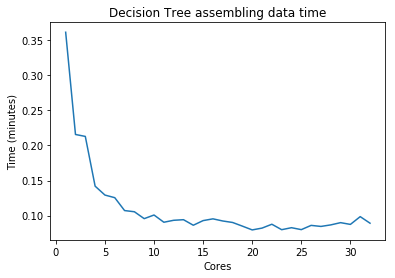

In [16]:
time_plot(record['dt_assembling_data_dict'],32,'Decision Tree assembling data time')

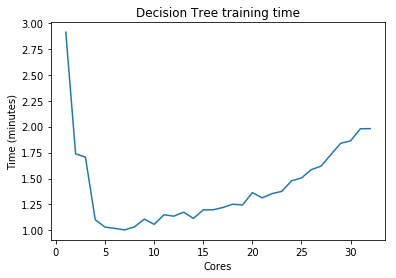

In [14]:
time_plot(record['dt_training_time_dict'],32,'Decision Tree training time')

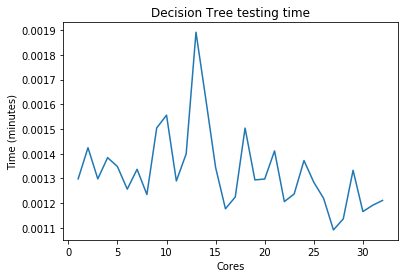

In [15]:
time_plot(record['dt_testing_time_dict'],32,'Decision Tree testing time')

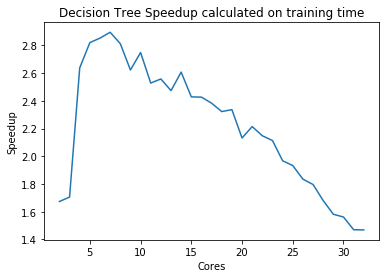

In [26]:
speedup_plot(record['dt_training_time_dict'],32,'Decision Tree Speedup calculated on training time')

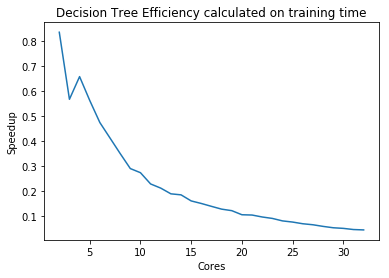

In [33]:
efficiency_plot(record['dt_training_time_dict'],32,'Decision Tree Efficiency calculated on training time')

### b) Random Forest

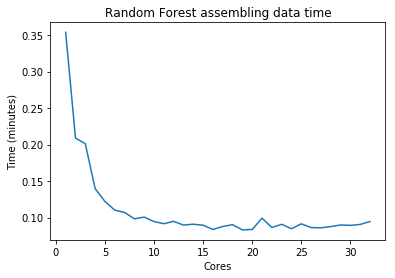

In [19]:
time_plot(record['rf_assembling_data_dict'],32,'Random Forest assembling data time')

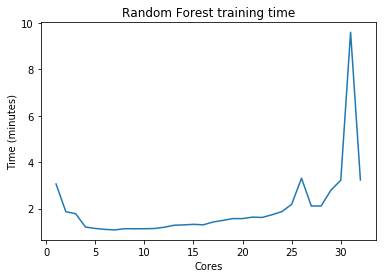

In [17]:
time_plot(record['rf_training_time_dict'],32,'Random Forest training time')

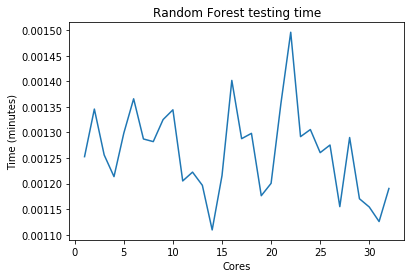

In [18]:
time_plot(record['rf_testing_time_dict'],32,'Random Forest testing time')

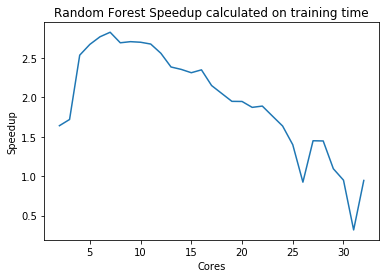

In [27]:
speedup_plot(record['rf_training_time_dict'],32,'Random Forest Speedup calculated on training time')

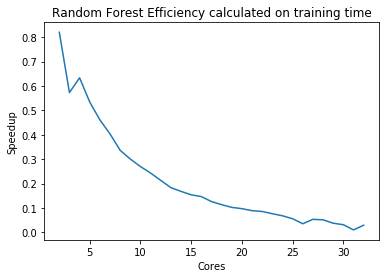

In [34]:
efficiency_plot(record['rf_training_time_dict'],32,'Random Forest Efficiency calculated on training time')

### c) Logistic Regression

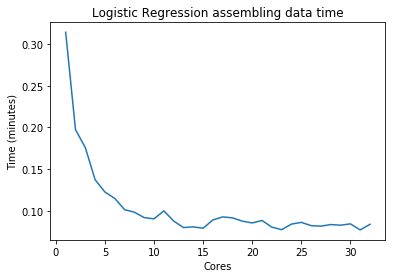

In [22]:
time_plot(record['lr_assembling_data_dict'],32,'Logistic Regression assembling data time')

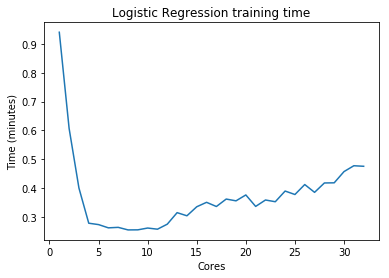

In [20]:
time_plot(record['lr_training_time_dict'],32,'Logistic Regression training time')

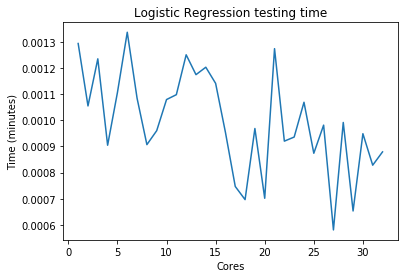

In [21]:
time_plot(record['lr_testing_time_dict'],32,'Logistic Regression testing time')

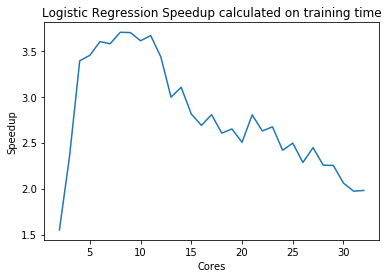

In [28]:
speedup_plot(record['lr_training_time_dict'],32,'Logistic Regression Speedup calculated on training time')

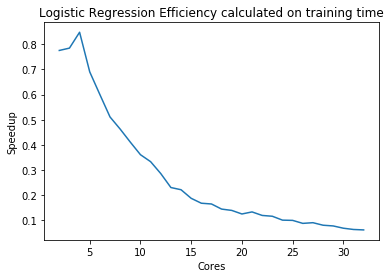

In [35]:
efficiency_plot(record['lr_training_time_dict'],32,'Logistic Regression Efficiency calculated on training time')